In [758]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from copy import deepcopy

In [759]:
url = r'data/drone_delivery_v1.csv'
df = pd.read_csv(url, 
                        sep = ';', 
                        header = 0, 
                        index_col = None,
                        na_values = '?')

print(df.describe())


          clientid            x            y
count  5956.000000  5956.000000  5956.000000
mean   2978.500000   508.823177   427.554772
std    1719.493433   271.061462   289.044640
min       1.000000     0.017692     0.043285
25%    1489.750000   282.582920   170.079921
50%    2978.500000   518.100892   397.786441
75%    4467.250000   727.156497   669.982518
max    5956.000000   999.533215   999.731720


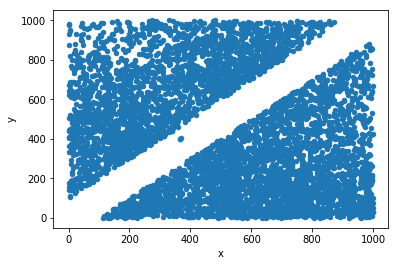

In [760]:
df.plot.scatter(x='x', y='y');

In [761]:
f1 = df['x'].values
f2 = df['y'].values
X = np.array(list(zip(f1, f2)))
# Number of clusters
k = 10

In [762]:
##Solution 1: using sklearn library

In [763]:
start = time.time()
kmeans = KMeans(k)
kmeans = kmeans.fit(X)
centroids = kmeans.cluster_centers_
end = time.time()
print(centroids)
kmTime = end - start

[[862.24607773 145.30662726]
 [202.19764982 526.79327776]
 [862.48688925 585.15607524]
 [568.38485594 119.00881157]
 [448.96508144 731.70755785]
 [316.32736281 103.85029867]
 [105.57480969 329.0037117 ]
 [627.56995326 894.18096842]
 [182.27092211 831.60452852]
 [631.21059935 352.77208992]]


In [764]:
df['zones'] = kmeans.labels_
df.head(10)

,clientid,x,y,zones
0,1,622.771572,164.857623,3
1,2,416.357298,630.193634,4
2,3,292.735020,567.333231,1
3,4,737.211288,166.225676,0
4,5,540.475375,682.912298,4
5,6,535.469492,318.439661,9
6,7,640.380050,870.833221,7
7,8,235.772075,359.048203,6
8,9,481.896884,661.491838,4
9,10,730.032789,312.177817,9


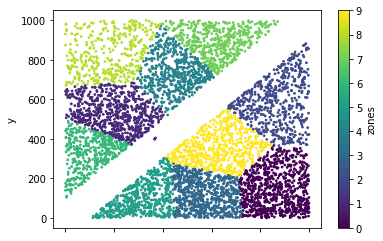

In [765]:
df.plot.scatter(x='x', y='y', c='zones', s=3, colormap='viridis')

In [766]:
### Solution 2: from https://mubaris.com/posts/kmeans-clustering/ for more detailed solution

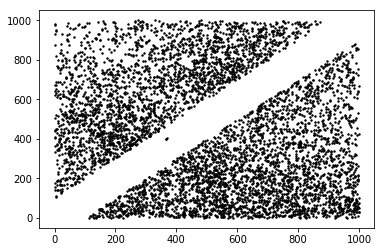

In [767]:
plt.scatter(f1, f2, c='black', s=2)

In [768]:

# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32) #here we create centroids
print(C)

[[645. 563.]
 [972. 136.]
 [278. 180.]
 [ 63. 169.]
 [478.   0.]
 [203. 750.]
 [ 56. 419.]
 [344. 573.]
 [270. 663.]
 [501. 113.]]


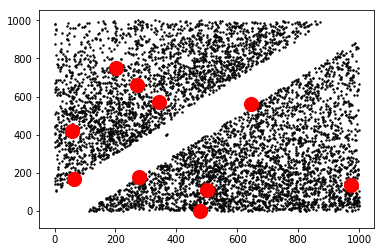

In [769]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=2)
plt.scatter(C_x, C_y, marker='o', s=200, c='r')


In [770]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [771]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
start = time.time()
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
   

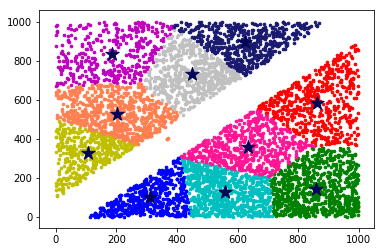

In [772]:
end =time.time() 
#colors must be > k

colors = ['r', 'g', 'b', 'y', 'c', 'm','#FF7F50','#C0C0C0','#191970','#FF1493']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


kmTime2 = end - start
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050556')

In [773]:
## Replace k-means with agglomerative hierarchical clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')


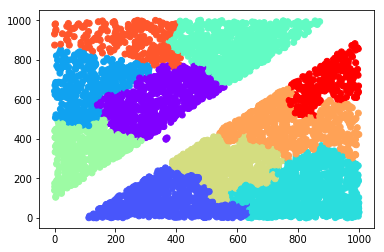

In [774]:
start = time.time()
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=k,
            pooling_func='deprecated').fit(X)
print(clustering)
end = time.time()
ahTime = end - start
clustering.labels_

plt.scatter(X[:,0],X[:,1], c=clustering.labels_, cmap='rainbow')

In [775]:
##Times
print("K-mean time: ",kmTime)
print("K-mean2 time: ",kmTime2)
print("agglomerative hierarchical clustering time: ",ahTime)

K-mean time:  0.5954074859619141
K-mean2 time:  7.498950958251953
agglomerative hierarchical clustering time:  1.7842285633087158
